<a href="https://colab.research.google.com/github/hyeineom12/BCcard-E-mart24-project/blob/main/DB_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 기본정보 및 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/대학교/수업/2025 - 3학년/데이터베이스 응용/과제데이터/DDUNIVDATA.csv", encoding='utf-8')
df.head()

,yyyymm,sex,age,cst_addr_no,weekend,aftern,lclss,sale_qty,sale_amt,sale_cnt
0,202307,1,1,NaN,1,0,5,29.0,81200.0,25
1,202307,1,1,NaN,1,1,5,69.0,259700.0,61
2,202307,1,1,NaN,0,0,6,749.0,3350600.0,686
3,202307,1,1,NaN,0,1,6,1984.0,9040200.0,1779
4,202307,1,1,11.0,1,0,99,37.0,72800.0,33


In [ ]:
# 데이터 기본 정보 확인
print("데이터 크기:", df.shape)
print("컬럼명:\n", df.columns)

데이터 크기: (118176, 10)
컬럼명:
 Index(['yyyymm', 'sex', 'age', 'cst_addr_no', 'weekend', 'aftern', 'lclss',
       'sale_qty', 'sale_amt', 'sale_cnt'],
      dtype='object')


In [ ]:
# 필요한 데이터만 남기고 삭제
df = df.drop(['cst_addr_no'], axis=1)

In [ ]:
# 결측치 확인
print("결측치 개수:\n", df.isnull().sum())

결측치 개수:
 yyyymm      0
sex         0
age         0
weekend     0
aftern      0
lclss       0
sale_qty    0
sale_amt    0
sale_cnt    0
dtype: int64


# mz세대와 기성세대의 소비 비교

In [ ]:
mz_df = df[df['age'].isin([1, 2])]
older_df = df[~df['age'].isin([1, 2])]

print("MZ세대 그룹 데이터 크기:", mz_df.shape)
print("기성세대 그룹 데이터 크기:", older_df.shape)

MZ세대 그룹 데이터 크기: (53067, 9)
기성세대 그룹 데이터 크기: (65109, 9)


/tmp/ipython-input-1237501050.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale_amt_summary, x='Age Group', y='Total Sale Amount', palette={'MZ': 'blue', 'Older': 'red'})


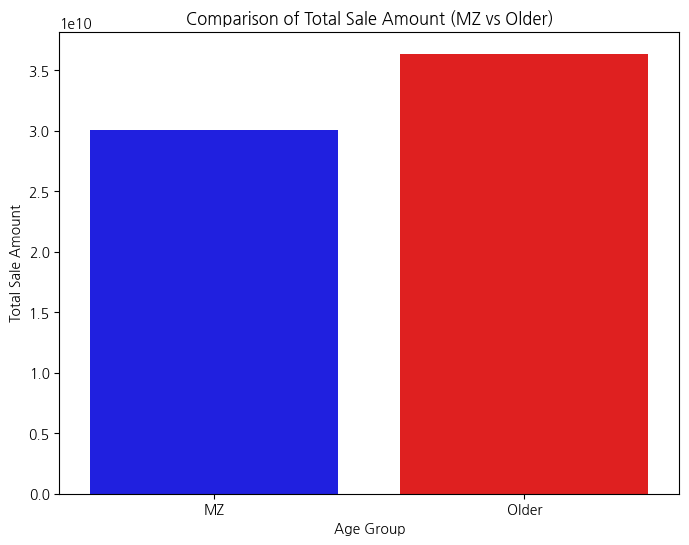

In [ ]:
# MZ세대 총 구매금액과 older세대 총 구매금액의 차이 그래프 그리기

mz_sale_amt_sum = mz_df['sale_amt'].sum()
older_sale_amt_sum = older_df['sale_amt'].sum()


sale_amt_summary = pd.DataFrame({
    'Age Group': ['MZ', 'Older'],
    'Total Sale Amount': [mz_sale_amt_sum, older_sale_amt_sum]
})


plt.figure(figsize=(8, 6))
sns.barplot(data=sale_amt_summary, x='Age Group', y='Total Sale Amount', palette={'MZ': 'blue', 'Older': 'red'})
plt.title('Comparison of Total Sale Amount (MZ vs Older)')
plt.ylabel('Total Sale Amount')
plt.xlabel('Age Group')
plt.show()

# mz세대 성별 구매 항목 파악

In [ ]:
mz_male_df = mz_df[mz_df['sex'] == 1]
mz_female_df = mz_df[mz_df['sex'] == 2]

print("MZ세대 남성 그룹 데이터 크기:", mz_male_df.shape)
print("MZ세대 여성 그룹 데이터 크기:", mz_female_df.shape)

MZ세대 남성 그룹 데이터 크기: (28688, 9)
MZ세대 여성 그룹 데이터 크기: (24379, 9)


In [ ]:
mz_male_lclss_sales = mz_male_df.groupby('lclss')['sale_qty'].sum().reset_index()
mz_female_lclss_sales = mz_female_df.groupby('lclss')['sale_qty'].sum().reset_index()

mz_male_lclss_sales = mz_male_lclss_sales.rename(columns={'sale_qty': 'male_sale_qty'})
mz_female_lclss_sales = mz_female_lclss_sales.rename(columns={'sale_qty': 'female_sale_qty'})

In [ ]:
merged_lclss_sales = pd.merge(mz_male_lclss_sales, mz_female_lclss_sales, on='lclss', how='outer').fillna(0)

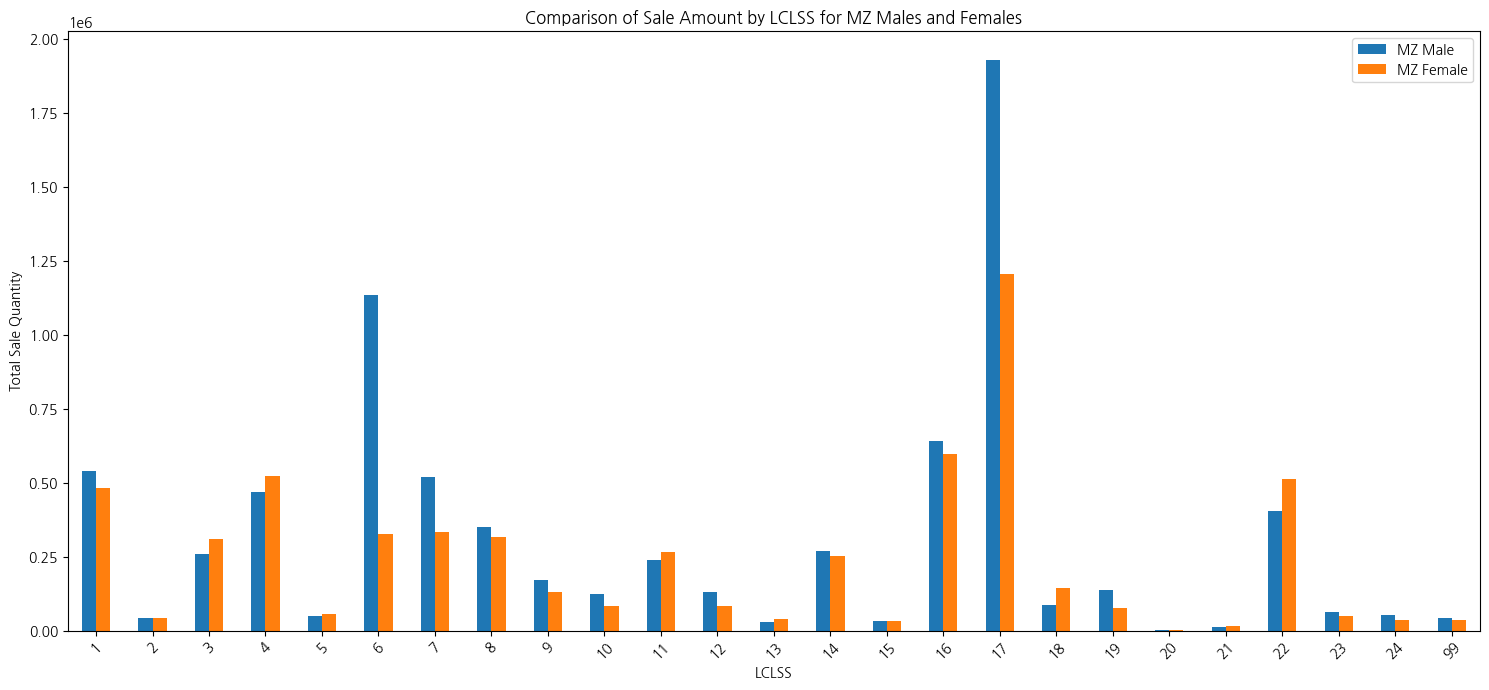

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
merged_lclss_sales.plot(kind='bar', x='lclss', y=['male_sale_qty', 'female_sale_qty'], ax=ax)
plt.title('Comparison of Sale Amount by LCLSS for MZ Males and Females')
plt.xlabel('LCLSS')
plt.ylabel('Total Sale Quantity')
plt.xticks(rotation=45)
plt.legend(['MZ Male', 'MZ Female'])
plt.tight_layout()
plt.show()

In [ ]:
# MZ세대 남성, 여성별로 가장 많이 구매하는 품목 상위 5개 출력

top_5_male_lclss = merged_lclss_sales.sort_values(by='male_sale_qty', ascending=False).head(5)


top_5_female_lclss = merged_lclss_sales.sort_values(by='female_sale_qty', ascending=False).head(5)

print("MZ세대 남성 lclss별 총 구매금액 상위 5개:")
display(top_5_male_lclss)

print("\nMZ세대 여성 lclss별 총 구매금액 상위 5개:")
display(top_5_female_lclss)

MZ세대 남성 lclss별 총 구매금액 상위 5개:


,lclss,male_sale_qty,female_sale_qty
16,17,1930230.0,1204322.0
5,6,1135533.0,326432.0
15,16,640600.0,596623.0
0,1,540631.0,480451.0
6,7,517878.0,331742.0



MZ세대 여성 lclss별 총 구매금액 상위 5개:


,lclss,male_sale_qty,female_sale_qty
16,17,1930230.0,1204322.0
15,16,640600.0,596623.0
3,4,468943.0,524090.0
21,22,404700.0,514159.0
0,1,540631.0,480451.0


In [ ]:
top_5_male_lclss_list = top_5_male_lclss['lclss'].tolist()
top_5_female_lclss_list = top_5_female_lclss['lclss'].tolist()

combined_lclss_list = top_5_male_lclss_list + top_5_female_lclss_list

top_lclss_codes = list(set(combined_lclss_list))

print("Unique top LCLSS codes for MZ males and females:")
print(top_lclss_codes)

Unique top LCLSS codes for MZ males and females:
[1, 4, 6, 7, 16, 17, 22]


In [ ]:
# mz세대 남성 여성이 많이 구매한 상위품목에 해당하는 데이터 추출

mz_filtered_df = mz_df[mz_df['lclss'].isin(top_lclss_codes)]

In [ ]:
mz_lclss_pivot = mz_filtered_df.pivot_table(index=['yyyymm',
                                                   'sex', 'age', 'weekend', 'aftern'],
                                            columns='lclss', values='sale_amt', aggfunc='sum').reset_index()
mz_lclss_pivot = mz_lclss_pivot.fillna(0)

In [ ]:
correlation_matrix = mz_lclss_pivot.drop(['yyyymm', 'sex', 'age', 'weekend', 'aftern'], axis=1).corr()
print("Correlation Matrix of Top LCLSS Sales for MZ Group:")
display(correlation_matrix)

Correlation Matrix of Top LCLSS Sales for MZ Group:


lclss,1,4,6,7,16,17,22
lclss,,,,,,,
1,1.000000,0.952677,0.600248,0.641595,0.936595,0.883203,0.943138
4,0.952677,1.000000,0.585066,0.754193,0.888619,0.806121,0.910907
6,0.600248,0.585066,1.000000,0.824811,0.703439,0.829097,0.409095
7,0.641595,0.754193,0.824811,1.000000,0.668927,0.738094,0.491488
16,0.936595,0.888619,0.703439,0.668927,1.000000,0.899291,0.874559
17,0.883203,0.806121,0.829097,0.738094,0.899291,1.000000,0.739722
22,0.943138,0.910907,0.409095,0.491488,0.874559,0.739722,1.000000


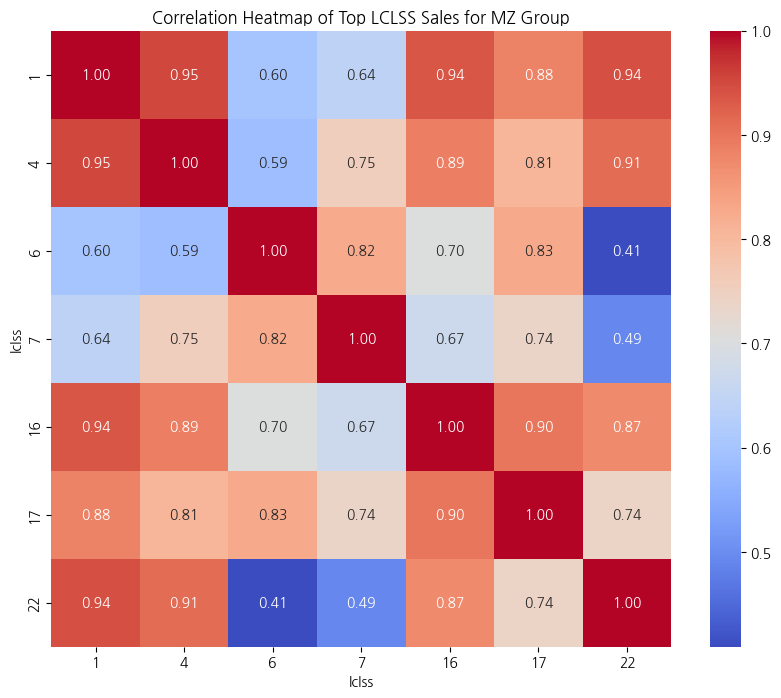

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Top LCLSS Sales for MZ Group')
plt.show()

# 가공식품&과자의 구매 시간대 및 요일 분석

In [ ]:
target_lclss = [1, 4]
mz_filtered_time_df = mz_df[mz_df['lclss'].isin(target_lclss)]

In [ ]:
target_lclss = [1, 4]
mz_filtered_time_df = mz_df[mz_df['lclss'].isin(target_lclss)]

# 주말, 주중 비교
weekend_sales = mz_filtered_time_df.pivot_table(
    index='lclss',
    columns='weekend',
    values='sale_qty',
    aggfunc='sum',
    fill_value=0
).reset_index()

# 0 = Weekday, 1 = Weekend
weekend_sales['Higher Sales Period'] = np.where(
    weekend_sales[1] > weekend_sales[0], 'Weekend',
    np.where(weekend_sales[1] < weekend_sales[0], 'Weekday', 'Equal')
)

# 오전, 오후 비교
aftern_sales = mz_filtered_time_df.pivot_table(
    index='lclss',
    columns='aftern',
    values='sale_qty',
    aggfunc='sum',
    fill_value=0
).reset_index()

# 0 = Morning, 1 = Afternoon
aftern_sales['Higher Sales Period'] = np.where(
    aftern_sales[1] > aftern_sales[0], 'Afternoon',
    np.where(aftern_sales[1] < aftern_sales[0], 'Morning', 'Equal')
)

for lclss_code in target_lclss:
    w_period = weekend_sales.loc[weekend_sales['lclss']==lclss_code, 'Higher Sales Period'].values[0]
    a_period = aftern_sales.loc[aftern_sales['lclss']==lclss_code, 'Higher Sales Period'].values[0]

    print(f"LCLSS {lclss_code}: {w_period}, {a_period}")

LCLSS 1: Weekday, Afternoon
LCLSS 4: Weekday, Afternoon


# 구매금액 예측

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/대학교/수업/2025 - 3학년/데이터베이스 응용/과제데이터/DDUNIVDATA.csv", encoding='utf-8')
df1 = df1.dropna(subset=['cst_addr_no'])
print(df1.shape)
df1.head()

(107503, 10)


,yyyymm,sex,age,cst_addr_no,weekend,aftern,lclss,sale_qty,sale_amt,sale_cnt
4,202307,1,1,11.0,1,0,99,37.0,72800.0,33
5,202307,1,1,11.0,1,1,99,65.0,144200.0,60
6,202307,1,1,11.0,0,0,18,508.0,1530000.0,456
7,202307,1,1,11.0,0,1,18,840.0,2936900.0,741
8,202307,1,1,26.0,1,0,3,17.0,42900.0,13


In [ ]:
print("데이터 타입 정보:")
print(df1.info())

print("수치형 기초 통계:")
display(df1.describe())

데이터 타입 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 107503 entries, 4 to 118175
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   yyyymm       107503 non-null  int64  
 1   sex          107503 non-null  int64  
 2   age          107503 non-null  int64  
 3   cst_addr_no  107503 non-null  float64
 4   weekend      107503 non-null  int64  
 5   aftern       107503 non-null  int64  
 6   lclss        107503 non-null  int64  
 7   sale_qty     107503 non-null  float64
 8   sale_amt     107503 non-null  float64
 9   sale_cnt     107503 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 9.0 MB
None
수치형 기초 통계:


,yyyymm,sex,age,cst_addr_no,weekend,aftern,lclss,sale_qty,sale_amt,sale_cnt
count,107503.000000,107503.000000,107503.000000,107503.000000,107503.000000,107503.000000,107503.000000,107503.000000,1.075030e+05,107503.000000
mean,202353.910505,1.455615,2.812154,35.790992,0.429076,0.609760,13.558143,237.892384,5.712252e+05,175.163140
std,46.954058,0.498028,1.397595,12.395682,0.494947,0.487806,15.072845,1135.030327,3.622413e+06,821.447196
min,202307.000000,1.000000,1.000000,11.000000,0.000000,0.000000,1.000000,3.000000,1.000000e+02,3.000000
25%,202309.000000,1.000000,2.000000,28.000000,0.000000,0.000000,6.000000,8.000000,1.670000e+04,6.000000
50%,202312.000000,1.000000,3.000000,41.000000,0.000000,1.000000,11.000000,18.000000,3.960000e+04,14.000000
75%,202403.000000,2.000000,4.000000,47.000000,1.000000,1.000000,17.000000,62.000000,1.346000e+05,48.000000
max,202406.000000,2.000000,5.000000,52.000000,1.000000,1.000000,99.000000,36285.000000,1.568676e+08,25116.000000


In [ ]:
# sklearn의 OneHotEncoder와 StandardScalerd을 이용해 범주형 컬럼과 수치형 컬럼 구분

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df1 = df1.reset_index(drop=True)
df1['sale_qty'] = np.log1p(df1['sale_qty'])
df1['sale_cnt'] = np.log1p(df1['sale_cnt'])

numerical_features = ['sale_qty', 'sale_cnt']
categorical_features = ['sex', 'age', 'weekend', 'aftern', 'lclss']

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

x = df1.drop(['sale_amt', 'yyyymm'], axis=1)
y = np.log1p(df1['sale_amt'])

In [ ]:
# X와 y를 train 데이터와 test 데이터로 나누기

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
x_train_pre = preprocessor.fit_transform(x_train)
x_test_pre = preprocessor.transform(x_test)

선형 회귀 모델 (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train_pre, y_train)

y_pred1 = model1.predict(x_test_pre)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred1)

mse = mean_squared_error(y_test_real, y_pred_real)
mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = np.sqrt(mse)
R2 = model1.score(x_test_pre, y_test)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", R2)

MSE: 372857646965.22327
MAE: 75296.47110345171
RMSE: 610620.7063023848
R2: 0.9793912937118763


다항 회귀 모델(PolynomialFeatures)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)

x_train_poly = poly_features.fit_transform(x_train_pre)
x_test_poly = poly_features.transform(x_test_pre)

model2 = LinearRegression()
model2.fit(x_train_poly, y_train)

y_pred2 = model2.predict(x_test_poly)

In [ ]:
y_pred_real2 = np.expm1(y_pred2)

mse = mean_squared_error(y_test_real, y_pred_real2)
mae = mean_absolute_error(y_test_real, y_pred_real2)
rmse = np.sqrt(mse)
R2_train = model2.score(x_train_poly, y_train)
R2_test = model2.score(x_test_poly, y_test)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("Train R2:", R2_train)
print("Test R2:", R2_test)

MSE: 311404783702.71045
MAE: 50965.86645901316
RMSE: 558036.5433398698
Train R2: 0.9807419011397505
Test R2: 0.9813515763626476


랏소 회귀 모델(Lasso Regression)

In [ ]:
from sklearn.linear_model import Lasso

model3 = Lasso(random_state = 42)
model3.fit(x_train_pre, y_train)

y_pred3 = model3.predict(x_test_pre)

In [ ]:
y_pred_real3 = np.expm1(y_pred3)

mse = mean_squared_error(y_test_real, y_pred_real3)
mae = mean_absolute_error(y_test_real, y_pred_real3)
rmse = np.sqrt(mse)
R2 = model3.score(x_test_pre, y_test)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", R2)

MSE: 14973278953526.139
MAE: 535937.9514067452
RMSE: 3869532.1362570617
R2: 0.5289451642848613


릿지 회귀 모델(Ridge Regression)

In [ ]:
from sklearn.linear_model import Ridge

model4 = Ridge(random_state = 42)
model4.fit(x_train_pre, y_train)

y_pred4 = model4.predict(x_test_pre)

In [ ]:
y_pred_real4 = np.expm1(y_pred4)

mse = mean_squared_error(y_test_real, y_pred_real4)
mae = mean_absolute_error(y_test_real, y_pred_real4)
rmse = np.sqrt(mse)
R2 = model4.score(x_test_pre, y_test)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", R2)

MSE: 368759318468.89557
MAE: 75027.81340120934
RMSE: 607255.5627319486
R2: 0.9793919879509705


In [ ]:
import numpy as np

num_features = numerical_features

cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

all_features = np.concatenate([num_features, cat_features])

coefficients = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': model1.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients.head(10))

     Feature  Coefficient
27  lclss_15     1.602884
0   sale_qty     1.198027
14   lclss_2     0.850763
18   lclss_6     0.779404
33  lclss_21     0.672506
1   sale_cnt     0.491600
17   lclss_5     0.424615
32  lclss_20     0.369046
19   lclss_7     0.346281
22  lclss_10     0.342042


In [ ]:
import matplotlib.font_manager as fm
from matplotlib import rc

# 나눔고딕 폰트 경로 찾기
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=fontpath, size=12)

# 폰트 설정# 1) 나눔 글꼴 설치
!apt-get -qq update
!apt-get -qq install fonts-nanum

# 2) matplotlib 폰트 캐시 삭제 (중요)
import shutil, os
shutil.rmtree(os.path.expanduser("~/.cache/matplotlib"), ignore_errors=True)

# 3) 폰트 수동 등록 + 기본 폰트로 지정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)              # 새 폰트를 매니저에 등록
rcParams["font.family"] = "NanumGothic"        # 기본 폰트로 지정
rcParams["axes.unicode_minus"] = False         # 음수기호 깨짐 방지

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


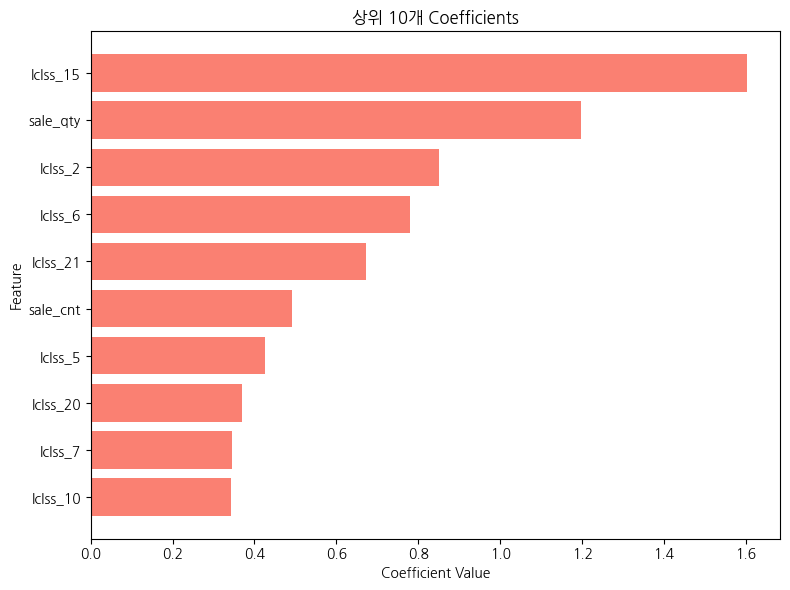

In [ ]:
top10 = coefficients.head(10)

plt.figure(figsize=(8, 6))
plt.barh(top10['Feature'], top10['Coefficient'], color='salmon')
plt.title("상위 10개 Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()